### О себе

- Закончил ТПУ ИСТ - информационные системы и технологии
- Год опыта в data science
- В настоящее время - дата аналитик в ЦФТ

### План лекции

- Откуда берутся логи, немного теории про сервисные архитектуры, REST API, JSON
- Элементарные операции с логами в формате .json
- Примеры работы с полураспарсенными логами - датафрейм содержит колонки с .json логами
- Примеры работы с сырыми логами - от .log файла к итоговому датафрему
- Tips - полезные советы при работе с логами и не только
- Описание домашней работы

### Формат лекции
- Вопросы желательно фиксировать в чате
- Обсуждать вопросы будем в конце лекции

### Зачем это нужно
Без этого никак.

# Немного теории

### Monolithic vs SOA

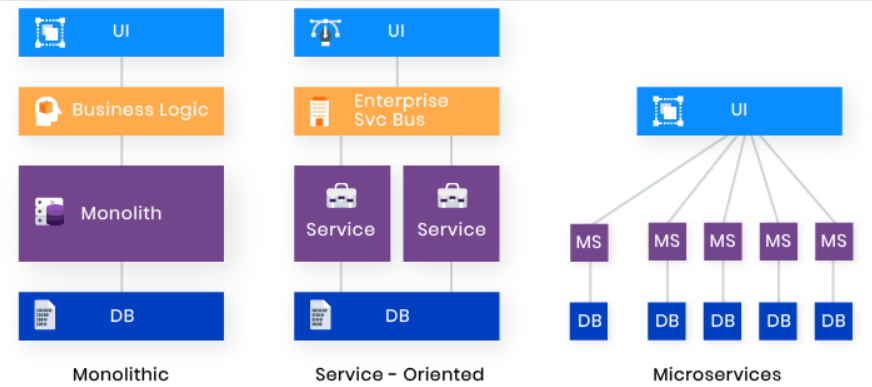

- Монолит - одно подразделение делает одно огромное приложение, которое, в нашем случае, полностью обрабатывает заявку клиента (скоринг, антифрод, 1С, зачисление, платежи, регуляторные требования и т.д.)
- Сервисно-ориентированная архитектура - каждый логический компонент разрабатывается отдельной командой:
    - Могут быть использованы разные языки программирования, разные БД и т.д.
    - Команды могут быть распределены по городам чтобы работать в одной временной зоне

#### Монолит

Плюсы:
- Дешево, не требует глубокого понимани системной архитектуры
- Идеально для небольших проектов - MVP, проверка гипотез
- Удобное управление данными
- В некоторых случаях даёт прирост производительности

Минусы:
- Высокий риск связанности кода (не путать со связностью)
- Есть риск полного переписывания кода в случае успеха MVP
- Унифицированный технологический стек
- Плохая масштабируемость
- Сложность параллельной разработки нескольких фич

#### Микросервисы

Плюсы:
- Быстрое добавление нового функционала
- Параллельная разработка
- Масштабируемость - множество готовых решений для развертывания на кластерах
- Отказоустойчивость (в теории, на практике сложнее)
- Короткие циклы разработки, более легкая настройка CI/CD
- Независимость от стека технологий (относительная)

Минусы:
- Дорогая инвестиция в архитектуру
- Сложность разработки, требуется высокая квалификация сотрудников (разработчики и DevOps)
- Много коммуникаций между командами
- Сложность поддержки транзакционной целостности
- Сложность тестирования полного цикла работы системы (хотя отдельные сервисы легче)
- Излишки по производительности в связи с пересылкой запросов
- Сложнее поддерживать требования безопасности
- Не подходит для MVP - слишком сложное решение

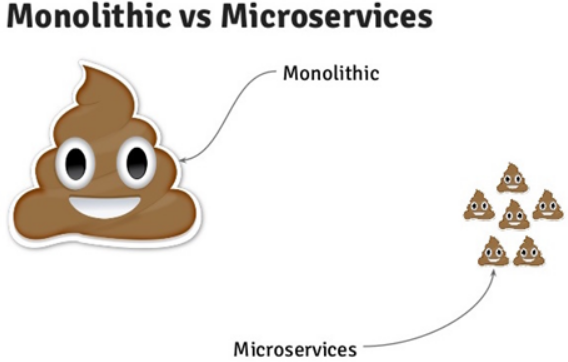

### Откуда берутся логи
- Запрос/ответ
    - Иногда интересен только запрос, ответ не логируется
- Промежуточные результаты работы сервиса (между запросом и ответом) - может генерировать бОльшую часть логов

### API. REST API. JSON как стандарт для запросов и ответов

#### API

#wikipedia

API (application programming interface) - программный интерфейс приложения, интерфейс прикладного программирования — описание способов (набор классов, процедур, функций, структур или констант), которыми одна компьютерная программа может взаимодействовать с другой программой.

API упрощает процесс программирования при создании приложений, абстрагируя базовую реализацию и предоставляя только объекты или действия, необходимые разработчику.

#### REST API

#wikipedia

REST (Representational State Transfer) — «передача репрезентативного состояния» или «передача "самоописываемого" состояния» — архитектурный стиль взаимодействия компонентов распределённого приложения в сети. 

REST - это набор правил о том, как программисту организовать написание кода серверного приложения, чтобы все системы легко обменивались данными и приложение можно было масштабировать.

##### Отсутствие состояния (одно из правил)

<...> в период между запросами клиента никакая информация о состоянии клиента на сервере не хранится. Все запросы от клиента должны быть составлены так, чтобы сервер получил всю необходимую информацию для выполнения запроса. <...>

Несмотря на то, что REST не является стандартом сам по себе, большинство RESTful-реализаций используют такие стандарты, как HTTP, URL, JSON и, реже, XML.

##### Основные типы HTTP запросов:

#wikipedia 

HTTP (англ. HyperText Transfer Protocol — «протокол передачи гипертекста») — протокол прикладного уровня передачи данных, изначально — в виде гипертекстовых документов в формате HTML, в настоящее время используется для передачи произвольных данных.

- GET - запрашивает представление ресурса. Запросы с использованием этого метода могут только извлекать данные.
- POST - используется для отправки сущностей к определённому ресурсу. Часто вызывает изменение состояния или какие-то побочные эффекты на сервере.
- PUT - заменяет все текущие представления ресурса данными запроса.
- DELETE - удаляет указанный ресурс.


#### JSON

#wikipedia

JSON (JavaScript Object Notation) - текстовый формат обмена данными, основанный на JavaScript. Легко читается людьми.

Несмотря на происхождение от JavaScript, формат является независимым от языка и может использоваться практически с любым языком программирования.

JSON-текст представляет собой набор пар ключ: значение. Ключом может быть только строка, значением — любая форма.

In [ ]:
{
   "firstName": "Иван",
   "lastName": "Иванов",
   "address": {
       "streetAddress": "Московское ш., 101, кв.101",
       "city": "Ленинград",
       "postalCode": 101101
   },
   "phoneNumbers": [
       "812 123-1234",
       "916 123-4567"
   ]
}

In [ ]:
<person>
  <firstName>Иван</firstName>
  <lastName>Иванов</lastName>
  <address>
    <streetAddress>Московское ш., 101, кв.101</streetAddress>
    <city>Ленинград</city>
    <postalCode>101101</postalCode>
  </address>
  <phoneNumbers>
    <phoneNumber>812 123-1234</phoneNumber>
    <phoneNumber>916 123-4567</phoneNumber>
  </phoneNumbers>
</person>

### Понимание назначений запросов, а также минимальное понимание сервисной архитектуры, необходимо для изучения существующих и новых бизнесс процессов.

#### Пример схемы взаимодействия между сервисам

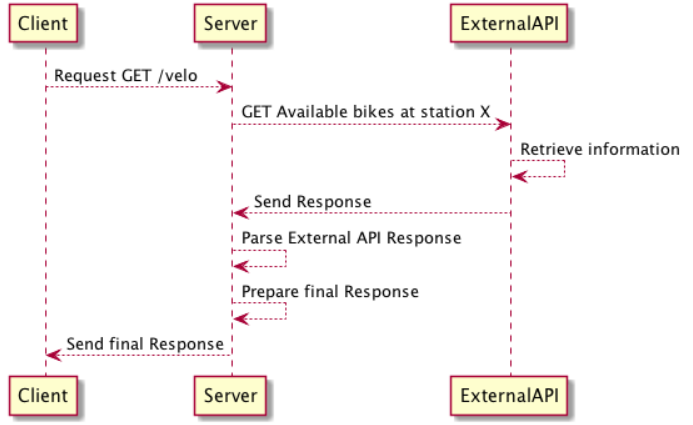


#### Пример описания API отдельного сервиса 

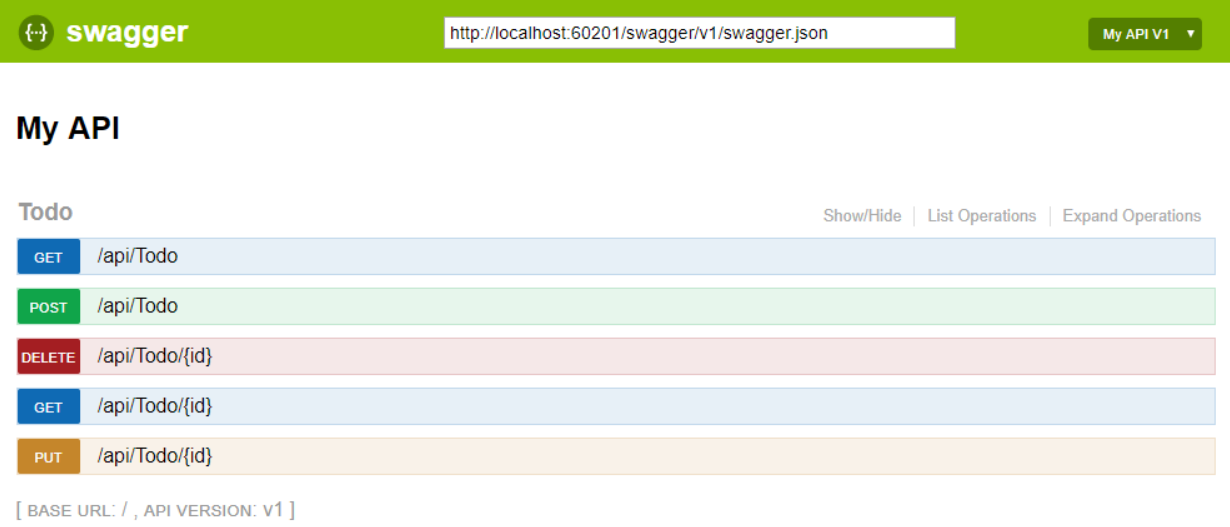

### Пример использования

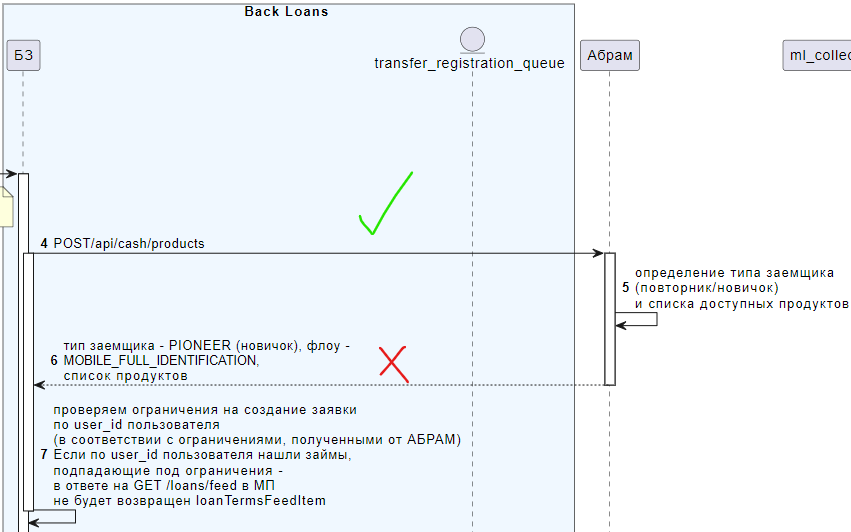

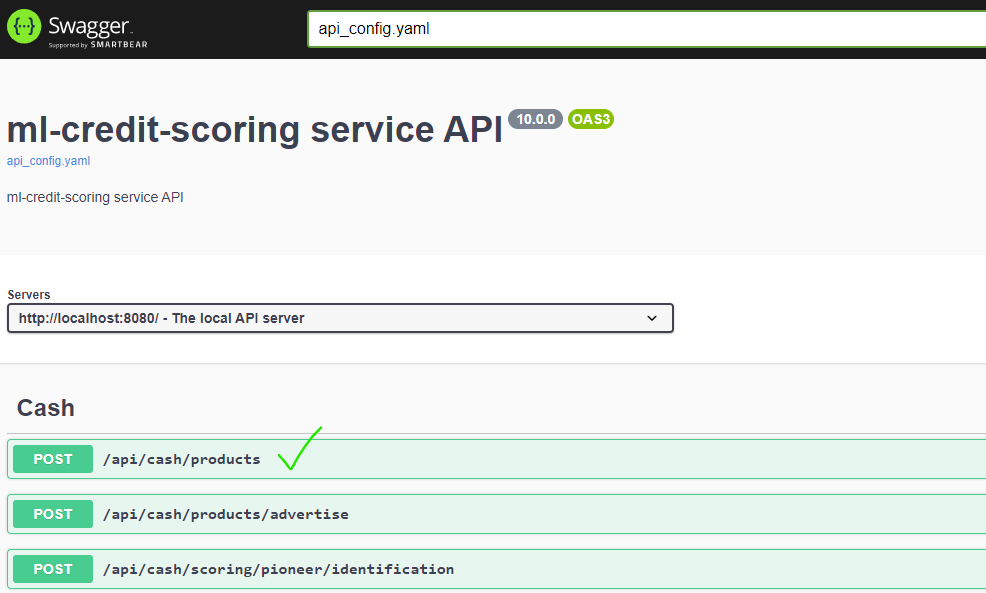

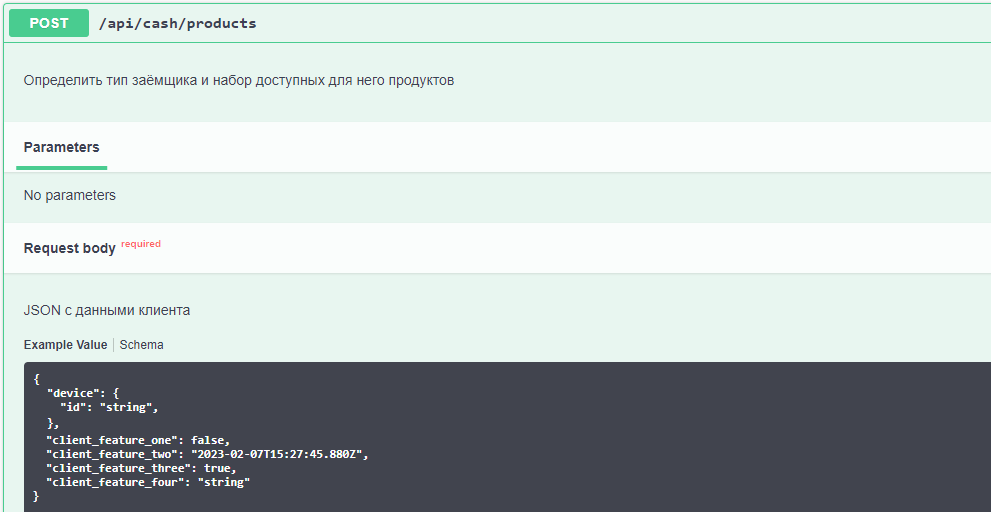

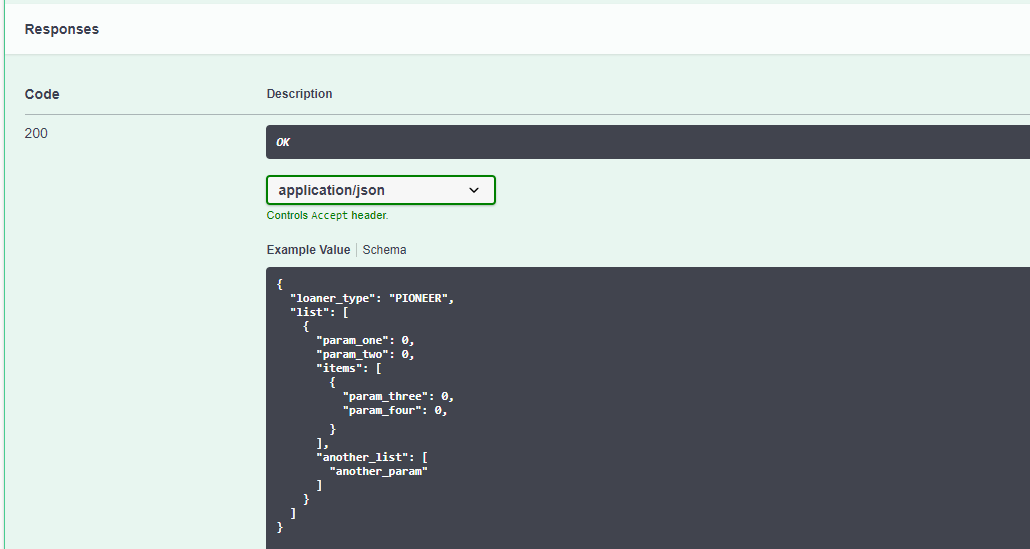

### Что нужно запомнить
- В крупной системе есть множество сервисов, которые общаются между собой в формате "запрос/ответ"
    - Желательно понимать базовые правила взаимодействия, назначение разных типов запросов
- Запрос/ответ - часто в формате .json (у нас только .json)
- Логи это информация о запросах и ответах, а также промежуточные результаты работы сервиса (между запросом и ответом)

# Элементарные операции с логами в формате .json

In [4]:
import json

JSON формат предполагает хранение данных в формате ключ -> значение. В python такой структуре данных соответствует тип dict.

Словарь (dict) представляет собой структуру данных (которая ещё называется ассоциативный массив), предназначенную для хранения произвольных объектов с доступом по ключу. Данные в словаре хранятся в формате ключ – значение. В списоке доступ к элементам осуществляется по индексу, который представляет собой целое неотрицательное число, причем мы сами, непосредственно, не участвуем в его создании (индекса). В словаре аналогом индекса является ключ, при этом ответственность за его формирование ложится на программиста.

Зададим простой JSON-текст

In [ ]:
simple_json = '{"id": 1, "income": 30000, "properties": {"age": 20, "birth_date": "01-01-2001", "sex": "M", "citizenship": "RUS"}}'

Распарсим строку использую функцию json.loads()

In [ ]:
simple_json_dict = json.loads(simple_json)

Получим объект типа dict

In [ ]:
type(simple_json_dict)

In [ ]:
simple_json_dict

Попробуем достать значение по ключу

In [ ]:
simple_json_dict['id']

In [ ]:
simple_json_dict['properties']

In [ ]:
type(simple_json_dict['properties'])

In [ ]:
simple_json_dict['properties']['age']

Попробуем изменить значение

In [ ]:
simple_json_dict['properties']['age'] = 55

In [ ]:
simple_json_dict

Имея объект типа dict можно сгенерировать строку в JSON формате с помощью функции json.dumps()

In [ ]:
json.dumps(simple_json_dict)

#### Некорректный формат json-текста - другой тип кавычек

In [ ]:
wrong_quotes = "{'id': 1, 'income': 30000, 'age': 20, 'birth_date': '01-01-2001', 'sex': 'M', 'citizenship': 'RUS'}"

Стандарт json предполагает использование двойных кавычек ", в случае испольлозование одинарных ' парсинг не будет работать

In [ ]:
wrong_quotes_dict = json.loads(wrong_quotes)

Можно заменить тип ковычек в строке и привести текст к корректному формату

In [ ]:
wrong_quotes = wrong_quotes.replace("'", '"')

In [ ]:
wrong_quotes

In [ ]:
wrong_quotes_dict = json.loads(wrong_quotes)

In [ ]:
wrong_quotes_dict

###### Могут встречаться и другие вариации подобных "проблем". Встречаются довольно редко, но стоит иметь в виду такой подход - ручное изменение исходного текста для последующего "автоматического" парсинга.

Вместо использования regex можно подумать как привести к требуемому формату и использовать стандартные функции для парсинга.

#### JSON содержит список

In [ ]:
json_with_list = '{"id": 6, "income": 55000, "previos_loans_id": [25478, 65423, 68957]}'

Функция парсинга json.loads() поддерживает тип данных list

In [ ]:
json_with_list_dict = json.loads(json_with_list)

In [ ]:
print(json_with_list_dict)

Посмотрим на типы данных получанных объектов

In [ ]:
print(type(json_with_list_dict))
print(type(json_with_list_dict['previos_loans_id']))
print(type(json_with_list_dict['previos_loans_id'][0]))

In [ ]:
json_with_list_dict['previos_loans_id']

In [ ]:
json_with_list_dict['previos_loans_id'][0]

Попробуем изменить значение внутри списка

In [ ]:
json_with_list_dict['previos_loans_id'][0] = 45

In [ ]:
print(json_with_list_dict)

In [ ]:
json.dumps(json_with_list_dict)

#### JSON содержит список JSON'ов

In [ ]:
json_with_list_of_jsons = '{"id": 6, "income": 55000, "documents": [{"serial":"FA", "number":666111}, {"serial":"FB", "number":666222}]}'

Аналогично предыдущему случаю - функция парсинга json.loads() поддерживает разные комбинации поддерживаемых типов

In [ ]:
json_with_list_of_jsons_dict = json.loads(json_with_list_of_jsons)

Посмотрим на типы данных получанных объектов

In [ ]:
print(type(json_with_list_of_jsons_dict))
print(type(json_with_list_of_jsons_dict['documents']))
print(type(json_with_list_of_jsons_dict['documents'][0]))
print(type(json_with_list_of_jsons_dict['documents'][0]['serial']))

In [ ]:
json_with_list_of_jsons_dict

Попробуем изменить значение внутри списка

In [ ]:
json_with_list_of_jsons_dict['documents'][0]['number'] = 12

In [ ]:
print(json_with_list_of_jsons_dict)

In [ ]:
json.dumps(json_with_list_of_jsons_dict)

#### JSON содержит объект

In [7]:
from dataclasses import dataclass

dataclass - декоратор, позволяющий автоматизировать генерацию кода классов, которые используются для хранения данных

In [5]:
json_with_object = '{"id": 1, "some_class": "SomeClass(some_field_1=\'hello\', some_field_2=1, some_field_3=2.2)"}'

Как правило, должно быть понимание происхождения логов, и как следствие, понимание какие объекты там могут быть. Простыми словами - как правило, известно что это за классы - можно прямо скопировать код из репозитория "сервиса", который этот лог сгенерировал.

Даже если не до конца понятно (или совсем непонятно), что за объекты фигурируют в логах - можно попробовать определить класс самим - надо не бояться экспериментировать.

Аналогично случаю с "одинарными ковычками" - лучше попробовать сделать "свой" класс и дальше работать с логами "как обычно", чем пытаться вытащить какие поля с помощью регулярных выражений (или как-то еще).

In [8]:
@dataclass
class SomeClass:
    some_field_1: str
    some_field_2: int
    some_field_3: float

Функция json.loads() ничего не знает об объектах, на текущем этапе "SomeClass(some_field_1=\'hello\', some_field_2=1, some_field_3=2.2)" обрабатывается просто как строка.

In [9]:
json_with_object_dict = json.loads(json_with_object)

In [10]:
json_with_object_dict

{'id': 1,
 'some_class': "SomeClass(some_field_1='hello', some_field_2=1, some_field_3=2.2)"}

In [11]:
type(json_with_object_dict['some_class'].some_field_1)

AttributeError: 'str' object has no attribute 'some_field_1'

Преобразование в объект просходит с помощью функции eval() - функция выполняет строку с кодом и возвращает результат выполнения.

В боевом коде пользоваться стоит с осторожностью.

In [ ]:
eval('2+2')

In [ ]:
eval('json_with_object.replace("1", "2")')

Результатов исполнения строки с объектом из логов является сам объект.

In [12]:
some_class_object = eval("SomeClass(some_field_1=\'hello\', some_field_2=1, some_field_3=2.2)")
type(some_class_object)

__main__.SomeClass

In [13]:
some_class_object

SomeClass(some_field_1='hello', some_field_2=1, some_field_3=2.2)

In [14]:
some_class_object.some_field_1

'hello'

При этом, в области видимости должно присутствовать "определение" конкретного класса.

In [15]:
eval("SomeClass2(some_field_1=\'hello\', some_field_2=1, some_field_3=2.2)")

NameError: name 'SomeClass2' is not defined

Попробуем завершить парсинг рассматриваемого JSON-текса

In [16]:
json_with_object_dict['some_class'] = eval(json_with_object_dict['some_class'])

In [17]:
type(json_with_object_dict['some_class'])

__main__.SomeClass

In [18]:
json_with_object_dict

{'id': 1,
 'some_class': SomeClass(some_field_1='hello', some_field_2=1, some_field_3=2.2)}

Аналогично рассмотренных выше примерам, можно обращаться и менять поля объекта.

In [19]:
json_with_object_dict['some_class'].some_field_1

'hello'

In [20]:
json_with_object_dict['some_class'].some_field_1 = 'privet'

In [21]:
json_with_object_dict

{'id': 1,
 'some_class': SomeClass(some_field_1='privet', some_field_2=1, some_field_3=2.2)}

По умолчанию, функция json.dumps() не поддерживает пользовательские типы данных

In [22]:
json.dumps(json_with_object_dict)

TypeError: Object of type SomeClass is not JSON serializable

Можно либо расширять класс дополнительными функциями, необходимыми для корректной работы json.dumps(). Либо предобработать словарь перед конвертацией в JSON - заменить объект на строку, как в исходном примере.

In [23]:
str(json_with_object_dict['some_class'])

"SomeClass(some_field_1='privet', some_field_2=1, some_field_3=2.2)"

In [24]:
json_with_object_dict['some_class'] = str(json_with_object_dict['some_class'])

In [25]:
json.dumps(json_with_object_dict)

'{"id": 1, "some_class": "SomeClass(some_field_1=\'privet\', some_field_2=1, some_field_3=2.2)"}'

#### JSON содержит список объектов

In [ ]:
json_with_list_of_objects = '{"id": 1, "some_classes": ["SomeClass(some_field_1=\'hello\', some_field_2=1, some_field_3=2.2)", "SomeClass(some_field_1=\'world\', some_field_2=3, some_field_3=4.4)"]}'

Аналогично прошлому примеру - сначала парсим как список строк

In [ ]:
json_with_list_of_objects_dict = json.loads(json_with_list_of_objects)

In [ ]:
json_with_list_of_objects_dict

In [ ]:
print(type(json_with_list_of_objects_dict['some_classes']))
print(type(json_with_list_of_objects_dict['some_classes'][0]))
print(type(json_with_list_of_objects_dict['some_classes'][1]))

Нужно применить функцию eval() к каждому элементу массива

In [ ]:
for i in range(len(json_with_list_of_objects_dict['some_classes'])):
    json_with_list_of_objects_dict['some_classes'][i] = eval(json_with_list_of_objects_dict['some_classes'][i])

In [ ]:
json_with_list_of_objects_dict

In [ ]:
print(type(json_with_list_of_objects_dict['some_classes']))
print(type(json_with_list_of_objects_dict['some_classes'][0]))
print(type(json_with_list_of_objects_dict['some_classes'][1]))

# Примеры работы с полураспарсенными логами - датафрейм содержит колонки с .json логами

In [ ]:
import pandas as pd

#### Датафрейм содержит колонку с json объектом

In [ ]:
df_json = pd.read_parquet('examples/examples_parquet/nested_json_example.parquet')

In [ ]:
df_json

In [ ]:
type(df_json['properties'].loc[0])

Аналогично предыдущим простым примерам - можно редактировать значения внутри конкретного словаря

In [ ]:
df_json['properties'].loc[0]

In [ ]:
df_json['properties'].loc[0]['age'] = 30

In [ ]:
df_json

Попробуем извлечь значения из словарей в виде отдельных колонок разными способами.

In [ ]:
df_json['age'] = df_json['properties'].str['age']
df_json['birth_date'] = df_json['properties'].str['birth_date']
df_json['citizenship'] = df_json['properties'].str['citizenship']
df_json['sex'] = df_json['properties'].str['sex']

In [ ]:
df_json.drop(columns=['properties'])

Вернем датафрейм в исходное состояние.

In [ ]:
df_json = df_json.drop(columns=['age', 'birth_date', 'citizenship', 'sex'])

In [ ]:
df_json

Рассмотрим второй способ

In [ ]:
# читать документацию надо, но хороший способо понять как работает функция - попробовать
df_json_normalized = pd.json_normalize(df_json['properties'])

In [ ]:
df_json_normalized

Очень важны индексы. После json_normalize индексы будут с нуля. 

pd.concat() работает по индексам -> они должны совпадать с исходным датафреймом.

Решение - делать reset_index() в исходном датафрейме (если это необходимо и  <font color='red'>если это ничего не испортит</font>)

In [ ]:
pd.concat([df_json, df_json_normalized], axis=1).drop(columns=['properties'])

Определим функцию, которая принимает на вход датафрейм, и колонку, из которой нужно достать все поля в виде отдельных колонок.

In [ ]:
def normalize_column(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """Заменяет колонку со словарем на несколько колонок.
    
    Имена новых колонок - ключи словаря
    Значения в новых колонок - значения по заданному ключу в словаре
    """
    return pd.concat(
        [
            df, 
            pd.json_normalize(df[column]),
        ], 
        axis=1
    ).drop(columns=[column])

#### Датафрейм содержит json объект (в виде строки)

In [ ]:
df_json_str = pd.read_parquet('./examples/examples_parquet/nested_json_str_example.parquet')

In [ ]:
df_json_str

In [ ]:
df_json_str['properties'].loc[0]

In [ ]:
type(df_json_str['properties'].loc[0])

Ни один из рассмотренных методов не будет работать со строкой

In [ ]:
df_json_str['properties'].str["age"]

In [ ]:
pd.json_normalize(df_json_str['properties'])

Необходимо распарсить строки с помощью (уже хорошо известной) функции json.loads()

In [ ]:
df_json_str['properties'] = df_json_str['properties'].apply(lambda x: json.loads(x))

In [ ]:
df_json_str

In [ ]:
type(df_json_str['properties'].loc[0])

Используя собственную функцию для нормализации колонки получим такой же результат как в первом примере.

In [ ]:
df_json_str = normalize_column(df_json_str, 'properties')

In [ ]:
df_json_str

Если проблемы с ковычками, сначала делаем предобработку, потом json.loads()

#### Датафрейм содержит список

In [ ]:
df_list = pd.read_parquet('./examples/examples_parquet/nested_list_example.parquet')

In [ ]:
df_list

Вытаскивать значения из словаря мы уже умеем.

In [ ]:
df_list = normalize_column(df_list, 'properties')

In [ ]:
df_list

Что делать со списком зависит от задачи:
- Можно посчитать агрегаты, например количество элементов 
- Можно взять какой-то конкретный элемент (в целом также можно делать и для словарей)
- Можно "развернуть" список, чтобы в каждой строке был новый элемент списка, а значения в других колонка дублировались

In [ ]:
df_list['previos_loans_id_count'] = df_list['previos_loans_id'].apply(lambda x: len(x))

In [ ]:
df_list

Попробуем развернуть список.

Обратим внимание, что индексы также дублируются.

In [ ]:
df_list.explode('previos_loans_id')

#### Датафрейм содержит список json'ов

In [ ]:
df_list_of_jsons = pd.read_parquet('./examples/examples_parquet/nested_list_json_example.parquet')

In [ ]:
df_list_of_jsons

In [ ]:
df_list_of_jsons.documents.loc[0]

C колонками с типами dict и list мы научились работать, оставим их без изменений. Рассмотрим тип list[dict].

Для начала "развернем" список с помощью функции pd.explode()

In [ ]:
df_list_of_jsons = df_list_of_jsons.explode('documents')

In [ ]:
df_list_of_jsons

Как было сказано ранее, если индексы не совпадают, то pd.concat() работать не будет.

In [ ]:
pd.json_normalize(df_list_of_jsons['documents'])

In [ ]:
pd.concat([df_list_of_jsons, pd.json_normalize(df_list_of_jsons['documents'])], axis=1)

Сделаем reset_index()

In [ ]:
df_list_of_jsons.reset_index(drop=True)

In [ ]:
df_list_of_jsons = normalize_column(df_list_of_jsons.reset_index(drop=True), 'documents')

In [ ]:
df_list_of_jsons

#### Датафрейм содержит список объектов

In [ ]:
from dataclasses import dataclass

@dataclass
class Document:
    serial: str
    number: int

In [ ]:
df_list_of_objects = pd.read_parquet('./examples/examples_parquet/nested_list_of_objects_example.parquet')

Теже самые документы, но в виде объекта Document - хотими также вытащить серию и номер в виде отдельных колонок.

In [ ]:
df_list_of_objects

Также как в примерах выше, в колонке documents лежат строки, содержащие данные об объекте типа Document.

In [ ]:
df_list_of_objects['documents'].loc[0]

In [ ]:
type(df_list_of_objects['documents'].loc[0][0])

Определим класс для корректного парсинга

In [ ]:
@dataclass
class Document:
    serial: str
    number: int

Для каждой строки датафрейма, для каждого элемента массива выполним функцию eval()

In [ ]:
df_list_of_objects['documents'] = df_list_of_objects['documents'].apply(lambda x: [eval(doc) for doc in x])

Теперь данные о документе имеют тип Document и можно вытащить данные о серии и номере обращаясь к полю класса.

In [ ]:
df_list_of_objects['documents'].loc[0]

In [ ]:
type(df_list_of_objects['documents'].loc[0][0])

Значения внутри конкретных полей можно менять также как при работе со словарем

In [ ]:
df_list_of_objects['documents'].loc[0][0].number

In [ ]:
df_list_of_objects['documents'].loc[0][0].number = 999

In [ ]:
df_list_of_objects

Для получения конечного результата сначала развернем список, а затем вытащим значения из объекта Document

In [ ]:
df_list_of_objects = df_list_of_objects.explode('documents').reset_index(drop=True)

In [ ]:
df_list_of_objects

In [ ]:
df_list_of_objects['serial'] = df_list_of_objects['documents'].apply(lambda x: x.serial)
df_list_of_objects['number'] = df_list_of_objects['documents'].apply(lambda x: x.number)

In [ ]:
df_list_of_objects

Если сильно нравится работать со словарями, то можно представить объект в виде словаря и использовать, например, pd.json_normalize().

В общем случае, это дополнительное действие - на больших данных нужно думать о необходимости, фактически, каждого действия и каждой дополнительной колонки.

In [ ]:
from dataclasses import asdict
df_list_of_objects['documents'] = df_list_of_objects['documents'].apply(lambda x: asdict(x))

In [ ]:
df_list_of_objects

# Примеры работы с сырыми логами - от .log файла к итоговому датафрему

#### Чтение по строкам

In [ ]:
import pandas as pd
with open('./examples/examples_log/simple_example.log') as f:
    for line in f:
        print(line)

Если файл большой, можно поставить счетчик и посмотреть на несколько первых строк.

In [ ]:
with open('./examples/examples_log/simple_example.log') as f:
    i = 0
    for line in f:
        print(line)
        i += 1
        if i == 2:
            break

Каждая строка .log файла представляет собой "JSON-текст", который мы рассматривали в начале. Следовательно, мы можем воспользоваться функцией json.loads(), чтобы из строки сделать словарь

Иногда строка с отдельным JSON'ом может заканчиваться символом конца строки '\n'. В таком случае, для корректной работы json.loads() необходимо этот символ удалить

In [ ]:
with open('./examples/examples_log/simple_example.log') as f:
    for line in f:
        print(json.loads(line))  # json.loads(line.replace('\n', ''))
        print(type(json.loads(line)))      
        break

Сформируем список словарей

In [ ]:
data = []

with open('./examples/examples_log/simple_example.log') as f:
    for line in f:
        data.append(json.loads(line))  # json.loads(line.replace('\n', ''))

In [ ]:
data

In [ ]:
data[0]['income']

Создадим датафрейм. Конструктор датафрейма поддерживает список словарей как входной параметр.

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

#### Чтение тяжелого файла

Посмотрим, что собой представляет типовая строка имеющегося .log файла.

In [ ]:
with open('./examples/examples_log/nested_list_of_objects_example.log') as f:
    for line in f:
        print(json.dumps(json.loads(line), indent=4))
        break

##### Предположим что нам надо взять только id, дату рождения, пол, гражданство, документы содержащие 'А' в серии и количество элементов в массиве 'previos_loans_id'

Определим класс Document

In [ ]:
@dataclass
class Document:
    serial: str
    number: int

Определим функцию, которая принимает на вход словарь (распарсенную строку .log файла) определенного формата и возвращает словарь, содержащий только необходимые значения.

In [ ]:
def process_data(data: dict) -> dict:
    documents = [eval(doc) for doc in data['documents']]
    documents = [doc for doc in documents if 'A' in doc.serial]
    return {
        'id': data['id'],
        'birth_date': data['properties']['birth_date'],
        'sex': data['properties']['sex'],
        'citizenship': data['properties']['citizenship'],
        'documents': documents,
        'previous_loans_count': len(data['previos_loans_id'])
    }

Сформируем список словарей, содержащих необходимые данные.

In [ ]:
data = []

with open('./examples/examples_log/nested_list_of_objects_example.log') as f:
    for line in f:
        data.append(process_data(json.loads(line)))

In [ ]:
data

Создадим итоговый датафрейм.

In [ ]:
pd.DataFrame(data)

## Немного про tqdm

In [ ]:
import os
import time
from tqdm.notebook import tqdm

for filename in tqdm(os.listdir('examples/examples_log')):
    time.sleep(1)

In [ ]:
with open('examples/examples_log/nested_json_example.log') as f:
    for line in tqdm(f):
        json.loads(line)
        time.sleep(1)

In [ ]:
for filename in tqdm(os.listdir('examples/examples_log')):
    with open(f'examples/examples_log/{filename}') as f:
        for line in tqdm(f, leave=False):
            time.sleep(0.5)

# Tips - полезные советы при работе с логами и не только

Не стесняться обращаться к "сообществу", т.е. гуглить:
- Информации много
- Информация на английском, и гуглить тоже стоит на английском
- Не стоит игнорировать официальную документацию и пытаться сразу найти ответ на конкретный вопрос на stackoverflow  -> особенно в случае, когда предстоит познакомиться с чем-то полностью новым, официальная документация может хорошо помочь.

Не бояться экспериментировать:
- Лучший способ понять как работает функция (или конкретный код) - попробовать позапускать
- Для экспериментов можно использовать синтетические данные, похожие на реальные (как было рассмотрено выше), либо брать несколько строк из реальных данных

Учитывать объем данных:
- Не надо пытаться отлаживать алгоритм на всём объеме имеющихся данных
- Надо стараться задумываться об используемых алгоритмах, о последовательности операций, о лишних операциях и т.д.
    - Например, если в качестве параметра нужна длина списка, то нет смысла делать pd.DataFrame.explode(), затем pd.DataFrame.groupby()[some_column].count() - можно просто посчитать длину и удалить колонку с самим списком.
- Надо стараться задумываться о необходимых данных:
    - Например, в датафрейме может быть 1000+ колонок, при этом каждая колонка может занимать 1-10Гб оперативной памяти, в то время как для текущего анализа может требоваться лишь 5-10 колонок.
- Можно делать промежуточные этапы в парсинге логов:
    - Например, сервис пишет в логи все запросы, а нам интересны логи только от конкретного (другого) сервиса. Имеет смысл первым этапом просто отделить нужные логи, а затем, брать из этой "части", то что нужно. В таком случае не надо будет каждый раз перебирать намного бОльший объем данных.

# Домашнее задание

Из данных по Home Credit Default Risk было взято 2 файла:
- POS_CASH_balance.csv
- bureau.csv

Из этих двух файлов был составлен один .log файл. 

Используя .log файл, а также описание схемы данных (приведено ниже), необходимо написать скрипт, на выходе которого получается два .csv файла, идентичных по наполнению файлам из Home Credit Default Risk. 

Скрипт должен быть в виде .py файла

Приведенные схемы данных существенно отличаются от структуры данных в исходных файлах - это сделано для того, чтобы при выполнении задания использовать бОльшую часть рассмотренных приёмов.

Критерием успешного выполнения домашнего задания является скрипт (итоговые два .csv файла рассматриваются как следствие, в первую очередь будет проверяться код), удовлетворяющий следующим требованиям (упорядочены в порядке убывания важности):
   - Скрипт загружен в GitLab, сделан МР с изменениями, предоставлена ссылка на МР
   - Код является воспроизводимым:
       - Cкрипт содержит функцию main(), при вызове которой выполняется полный цикл подготовки данных (чтение, обработка, сохранение). При этом, должна быть реализована возможность задания следующих параметров:
            - Путь к входному .log файлу       
            - Два пути к двум результирующим .csv файлам
       - Т.е. у меня должно получиться просто взять и запустить файл, без проблем и лишних действий
   - Результатом скрипта являются два .csv файла, идентичных исходным файлам
   - Приемлемое время выполнения скрипта. В МРе, комментарием, должно быть указано примерное время выполнения. У меня работает примерно 15 минут на "обычном" ноутбуке (т.е. 2 часа это много, минут 30 - нормально):
       - AMD Ryzen 5 2500U
       - 8гб
       - 256 ssd
   
   - Структура и качество кода:
   
       - Выделение отдельных логических частей в виде функций
       
       - Вынесение общей логики в отдельные функции с целью переиспользования
       
       - Документирование кода
       
       - Осмысленные имена переменных
       
Домашнее задание выдается на неделю. Дедлайн 16 февраля.

# SCHEMA

POS_CASH_balance

In [ ]:
@dataclass
class PosCashBalanceIDs:
    SK_ID_PREV: int
    SK_ID_CURR: int
    NAME_CONTRACT_STATUS: str

In [ ]:
{
    'CNT_INSTALMENT': 24.0,  # float
    'records': [
        {
            'CNT_INSTALMENT_FUTURE': 16.0,  # float
            'MONTHS_BALANCE': -32,  # int
            'SK_DPD': 0,  # int
            'SK_DPD_DEF': 0,  # int
            'PosCashBalanceIDs': PosCashBalanceIDs(
                SK_ID_PREV=2371489, 
                SK_ID_CURR=274851, 
                NAME_CONTRACT_STATUS='Active'
            )  # PosCashBalanceIDs
        }
    ]
}

bureau

In [ ]:
@dataclass
class AmtCredit:
    CREDIT_CURRENCY: str
    AMT_CREDIT_MAX_OVERDUE: float
    AMT_CREDIT_SUM: float
    AMT_CREDIT_SUM_DEBT: float
    AMT_CREDIT_SUM_LIMIT: float
    AMT_CREDIT_SUM_OVERDUE: float
    AMT_ANNUITY: float

In [ ]:
{
    'CREDIT_TYPE': 'Credit card',  # str
    'record': {
        'SK_ID_CURR': 215354,  # int
        'SK_ID_BUREAU': 5714467,  # int
        'CREDIT_ACTIVE': 'Active',  # str
        'DAYS_CREDIT': -273,  # int
        'CREDIT_DAY_OVERDUE': 0,  # int
        'DAYS_CREDIT_ENDDATE': 27460.0,  # float
        'DAYS_ENDDATE_FACT': None,  # float
        'CNT_CREDIT_PROLONG': 0,  # int
        'DAYS_CREDIT_UPDATE': -31,  # int
        'AmtCredit': AmtCredit(
            CREDIT_CURRENCY='currency 1', 
            AMT_CREDIT_MAX_OVERDUE=0.0, 
            AMT_CREDIT_SUM=180000.0, 
            AMT_CREDIT_SUM_DEBT=71017.38, 
            AMT_CREDIT_SUM_LIMIT=108982.62,
            AMT_CREDIT_SUM_OVERDUE=0, 
            AMT_ANNUITY=None,
        )  # AmtCredit
    }
}

# Log file

In [ ]:
{
    "type": str,  # 'POS_CASH_balance' or 'bureau'
    "data": dict,  # data according to relevant schema
}